In [3]:
import nested_triangle as tr
import matplotlib.pyplot as plt 

fraction = 0.75
numOfTriangles = 100
numOfTrials = 50
transmissionRate = 0.7
initialRecoveryRate = 0.01
budget1 = 25
budget2 = 300

# inf1, inf2 = tr.calculateSCC(fraction, numOfTriangles, numOfTrials, transmissionRate, initialRecoveryRate, budget1, budget2)

# print(inf1)
# print(inf2)
inf1, inf2, scc_in_budget1, max_scc1_budget1, scc_out1_budget1, scc_in_budget2, max_scc1_budget2, scc_out1_budget2 = tr.calculateSCC(fraction, numOfTriangles, numOfTrials, transmissionRate, initialRecoveryRate, budget1, budget2)

print("Budget: 25")
print("Infection Size: " + str(inf1))
print("SCC IN: " + str(scc_in_budget1))
print("SCC: " + str(max_scc1_budget1))
print("SCC OUT: " + str(scc_out1_budget1))
print(" ")
print("Budget: 300")
print("Infection Size: " + str(inf2))
print("SCC IN: " + str(scc_in_budget2))
print("SCC: " + str(max_scc1_budget2))
print("SCC OUT: " + str(scc_out1_budget2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Budget: 25
Infection Size: 286.94
SCC IN: 1.2
SCC: 286.04
SCC OUT: 12.56
 
Budget: 300
Infection Size: 55.32
SCC IN: 27.78
SCC: 69.16
SCC OUT: 57.84


0
25
75
125
175
225
275
1
25
75
125
175
225
275
2
25
75
125
175
225
275
3
25
75
125
175
225
275
4
25
75
125
175
225
275
5
25
75
125
175
225
275
6
25
75
125
175
225
275
7
25
75
125
175
225
275
8
25
75
125
175
225
275
9
25
75
125
175
225
275
10
25
75
125
175
225
275
11
25
75
125
175
225
275
12
25
75
125
175
225
275
13
25
75
125
175
225
275
14
25
75
125
175
225
275
15
25
75
125
175
225
275
16
25
75
125
175
225
275
17
25
75
125
175
225
275
18
25
75
125
175
225
275
19
25
75
125
175
225
275
20
25
75
125
175
225
275
21
25
75
125
175
225
275
22
25
75
125
175
225
275
23
25
75
125
175
225
275
24
25
75
125
175
225
275
25
25
75
125
175
225
275
26
25
75
125
175
225
275
27
25
75
125
175
225
275
28
25
75
125
175
225
275
29
25
75
125
175
225
275
30
25
75
125
175
225
275
31
25
75
125
175
225
275
32
25
75
125
175
225
275
33
25
75
125
175
225
275
34
25
75
125
175
225
275
35
25
75
125
175
225
275
36
25
75
125
175
225
275
37
25
75
125
175
225
275
38
25
75
125
175
225
275
39
25
75
125
175
225
275
40
25
75
1

Text(0.5, 1.0, 'Infection Size vs SCC Size for 3-Configuration Model with 100 Triangles')

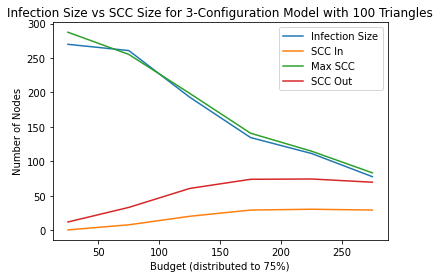

In [10]:
import nested_triangle as tr
import matplotlib.pyplot as plt 
import numpy as np
import random


numOfTriangles = 100
fraction = 0.75
initialRecoveryRate = 0.01
budgets = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
transmissionRate = 0.7
numOfTrails = 20

# numInfected = []
# sccInBudget = [] 
# MaxSccBudget = []
# SccOutBudget = []

graph = tr.triangle(numOfTriangles)
neighbors_per_node = tr.tuples_to_dict(graph, numOfTriangles*3)
recovery_rates = tr.strategyFraction(fraction, initialRecoveryRate, numOfTriangles, budgets[0])

num_infected = []
scc_in_budget = [] 
max_scc_budget = []
scc_out_budget = []

source = random.sample([i for i in range(0, numOfTriangles*3)], 10)

print(budgets[0])
node_rec_times, edge_transmit_times = tr.calculateSCC(source, neighbors_per_node, recovery_rates, numOfTriangles, transmissionRate, num_infected, scc_in_budget, max_scc_budget, scc_out_budget)

for x in range(1, len(budgets)):
  print(budgets[x])
  tr.newRecoveries(initialRecoveryRate, numOfTriangles, recovery_rates, node_rec_times, budgets[x], budgets[x-1])
  tr.calculaateSCC2(source, numOfTriangles, neighbors_per_node, node_rec_times, edge_transmit_times, num_infected, scc_in_budget, max_scc_budget, scc_out_budget)

# numInfected.append(num_infected)
  # sccInBudget.append(scc_in_budget)
  # MaxSccBudget.append(max_scc_budget)
  # SccOutBudget.append(scc_out_budget)

plt.plot(budgets, num_infected , label="Infection Size")
plt.plot(budgets, scc_in_budget, label="SCC In")
plt.plot(budgets, max_scc_budget, label="Max SCC")
plt.plot(budgets, scc_out_budget, label="SCC Out")
plt.legend()
plt.xlabel('Budget (distributed to 75%)')
plt.ylabel('Number of Nodes')
plt.title('Infection Size vs SCC Size for 3-Configuration Model with 100 Triangles')